In [72]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [73]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr : float #strike rate
    bpb: float #balls per boundary
    boundary_percent : float #boundary percent
    summary: str

In [74]:
def calculate_sr(state: BatsmanState):
    
    # Batting Strike Rate = (Total Runs Scored / Total Balls Faced) * 100 

    balls = state['balls']
    runs = state['runs']

    sr = (runs / balls) * 100

    return {'sr': sr}

In [75]:
def calculate_boundary_percent(state: BatsmanState):
    
    # Boundary Percentage = (Total Runs Scored Through Boundaries / Total Runs Scored) x 100

    runs = state['runs']
    fours = state['fours']
    sixes = state['sixes']

    boundary_percent = (((fours*4) + (sixes*6)) / runs) * 100

    return {'boundary_percent': boundary_percent}

In [ ]:
def calculate_bpb(state: BatsmanState):

    # Balls per Boundary = Total Balls Played / Total Boundaries Hit

    balls = state['balls']
    sixes = state['sixes']
    fours = state['fours']

    bpb = balls / (sixes + fours)


    return {'bpb': bpb}

In [77]:
def summary(state: BatsmanState) -> BatsmanState:
    
    summary = f"""
strike rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    {'summary': summary}

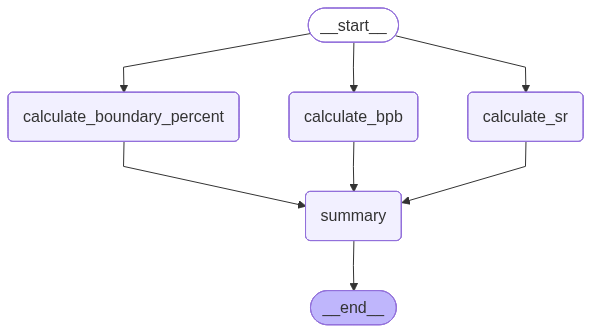

In [78]:
graph = StateGraph(BatsmanState)

# nodes
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)

# edges

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

workflow

In [79]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 6
}

workflow.invoke(initial_state)


{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 6,
 'sr': 200.0,
 'bpb': 4.166666666666667,
 'boundary_percent': 60.0}